In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
keras.__version__

Using TensorFlow backend.


'2.0.6'

In [24]:
def plot_images(images, labels):
    n_cols = min(5, len(images))
    n_rows = len(images) // n_cols
    fig = plt.figure(figsize=(8, 8))

    for i in range(n_rows * n_cols):
        sp = fig.add_subplot(n_rows, n_cols, i+1)
        plt.axis("off")
        plt.imshow(images[i], cmap=plt.cm.gray)
        sp.set_title(labels[i])
    plt.show()

In [13]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

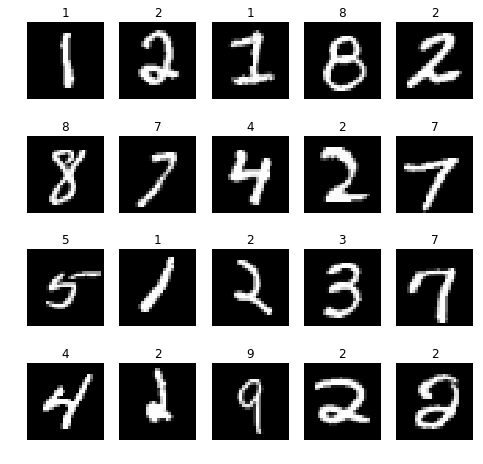

In [28]:
# lets plot random 20 images
p = np.random.permutation(len(X_train))
p = p[:20]
plot_images(X_train[p], y_train[p])

In [33]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [36]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [73]:
from keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D, Flatten, BatchNormalization
from keras.models import Model

img_input = Input(shape=(28, 28, 1))
_ = Conv2D(filters=32, kernel_size=(3,3))(img_input)
_ = Activation("relu")(_)
_ = BatchNormalization()(_)
_ = MaxPool2D()(_)

_ = Conv2D(filters=64, kernel_size=3)(_)
_ = Activation("relu")(_)
_ = BatchNormalization()(_)
_ = MaxPool2D()(_)

_ = Conv2D(filters=64, kernel_size=3)(_)
_ = Activation("relu")(_)
_ = BatchNormalization()(_)
_ = MaxPool2D()(_)

_ = Flatten()(_)
_ = Dense(60)(_)
_ = Activation("relu")(_)
_ = BatchNormalization()(_)
_ = Dense(10)(_)
_ = Activation("softmax")(_)

model = Model(inputs=img_input, outputs=_)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_40 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_41 (Activation)   (None, 11, 11, 64)        0         
__________

In [74]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 14s - loss: 0.2469 - acc: 0.9303    
Epoch 2/6
60000/60000 [==============================] - 12s - loss: 0.0623 - acc: 0.9823    
Epoch 3/6
60000/60000 [==============================] - 12s - loss: 0.0405 - acc: 0.9883    
Epoch 4/6
60000/60000 [==============================] - 12s - loss: 0.0295 - acc: 0.9917    
Epoch 5/6
60000/60000 [==============================] - 12s - loss: 0.0219 - acc: 0.9933    
Epoch 6/6
60000/60000 [==============================] - 12s - loss: 0.0165 - acc: 0.9952    


In [75]:
model.evaluate(X_test, y_test, batch_size=256)

 9472/10000 [===========================>..] - ETA: 0s

[0.052082487508561461, 0.9839]